<a href="https://colab.research.google.com/github/Ak74i/R-learning/blob/master/Coursera_grade_project_NV_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, we aim to analyze changes in NVidia's stock over a 23-day period. The dataset has a granularity of one minute and includes data only during stock exchange trading hours.

The last column named as "Profit" already codded according to either Loss (0) or Profit (1) for the current period of time
The purpose of the study is to train classification model to predic  stock performance according to this 2 levels of classification.

---



The source file is located at Google drive an contain .csv table with variours data.

In [ ]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import content of the file to dataframe
import pandas as pd

file_path = '/content/drive/MyDrive/MLProject/trading_data.csv'
NV_source = pd.read_csv(file_path)

Import nessesary libraries and tools:

In [ ]:
!pip install seaborn
!pip install pandas
!pip install numpy
!pip install scikit-learn
!pip install matplotlib

import pandas as pd
# import pylab as plt
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm  # optional progress bar
import matplotlib.pyplot as plt

def get_accuracy_boost_cv(X, y, title, times=20, cv=5, xlabel='Number Estimators',
                          Learning_rate_=[0.2, 0.4, 0.6, 1], n_est=100):
    """
    Performs K-fold cross-validation for XGBoost with hyperparameter tuning.

    Args:
        X: Input features.
        y: Target labels.
        title: Title for the plot.
        times: Number of times to repeat the evaluation process.
        cv: Number of folds for cross-validation.
        xlabel: Label for the x-axis of the plot.
        Learning_rate_: List of learning rates to try.
        n_est: Maximum number of estimators (trees) for XGBoost.

    Returns:
        None (plots the results).
    """

    lines_array = ['solid', '--', '-.', ':']
    N_estimators = [n * 2 for n in range(1, n_est)]
    train_acc = np.zeros((times, len(Learning_rate_), len(N_estimators)))
    test_acc = np.zeros((times, len(Learning_rate_), len(N_estimators)))

    # KFold Cross-Validation Loop
    for n in tqdm(range(times)):
        kf = KFold(n_splits=cv, shuffle=True, random_state=42)

        for train_index, test_index in kf.split(X):
            # Split data based on KFold indices
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            # Hyperparameter Tuning Loop
            for n_estimators in N_estimators:
                for j, lr in enumerate(Learning_rate_):
                    model = XGBClassifier(objective='binary:logistic',  # Assuming binary classification
                                         learning_rate=lr, n_estimators=n_estimators)
                    model.fit(X_train, y_train)

                    # Calculate accuracy
                    train_accuracy = accuracy_score(y_train, model.predict(X_train))
                    test_accuracy = accuracy_score(y_test, model.predict(X_test))

                    train_acc[n, j, (n_estimators // 2) - 1] = train_accuracy
                    test_acc[n, j, (n_estimators // 2) - 1] = test_accuracy

    # Plot Results
    fig, ax1 = plt.subplots()
    mean_test = test_acc.mean(axis=0)
    mean_train = train_acc.mean(axis=0)
    ax2 = ax1.twinx()

    for j, (lr, line) in enumerate(zip(Learning_rate_, lines_array)):
        ax1.plot(mean_train[j, :], linestyle=line, color='b', label="Learning rate " + str(lr))
        ax2.plot(mean_test[j, :], linestyle=line, color='r', label=str(lr))

    ax1.set_ylabel('Training Accuracy', color='b')
    ax1.legend()
    ax2.set_ylabel('Testing Accuracy', color='r')
    ax2.legend()
    ax1.set_xlabel(xlabel)
    plt.title(title)
    plt.show()

The structure anc content of the dataset presented below:

In [ ]:
NV_source.head(5)

,Datetime,Open,Close,Lagged_Close,Lagged_High,Lagged_Low,Lagged_Volume,SMA,EMA,RSI,...,OBV,Lagged_Price_Range,Rolling_Mean_5,Rolling_Volume_5,day_of_week,day_of_month,month,sentiment,Sentiment_Decay,Profit
0,2024-09-03 09:30:00,115.260002,115.280296,119.360001,119.599998,119.199997,3494782,119.028150,119.103746,63.622345,...,-53684235,0.400002,119.316159,1828017.2,1,3,9,-0.053227,-0.070840,1
1,2024-09-03 09:31:00,114.981598,114.980003,115.280296,115.309898,115.260002,16655815,118.802456,118.593952,16.597304,...,-70340050,0.049896,118.538219,4868205.0,1,3,9,0.000000,-0.067298,0
2,2024-09-03 09:32:00,114.089996,114.060303,114.980003,114.989998,114.970299,5183592,118.544600,118.112093,15.678696,...,-75523642,0.019699,117.666220,5641437.2,1,3,9,0.000000,-0.063933,0
3,2024-09-03 09:33:00,113.669998,113.639999,114.060303,114.089996,114.059998,2675430,118.227471,117.571854,13.258392,...,-78199072,0.029999,116.588400,5936682.6,1,3,9,0.000000,-0.060737,0
4,2024-09-03 09:34:00,113.796997,113.790001,113.639999,113.690002,113.620003,3601231,117.870757,117.047607,12.322231,...,-81800303,0.070000,115.464120,6322170.0,1,3,9,0.000000,-0.057700,0


In [ ]:
NV_source.shape

(7017, 28)

In [ ]:
NV_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Datetime            7017 non-null   object 
 1   Open                7017 non-null   float64
 2   Close               7017 non-null   float64
 3   Lagged_Close        7017 non-null   float64
 4   Lagged_High         7017 non-null   float64
 5   Lagged_Low          7017 non-null   float64
 6   Lagged_Volume       7017 non-null   int64  
 7   SMA                 7017 non-null   float64
 8   EMA                 7017 non-null   float64
 9   RSI                 7017 non-null   float64
 10  MACD                7017 non-null   float64
 11  MACD_Signal         7017 non-null   float64
 12  Bollinger_High      7017 non-null   float64
 13  Bollinger_Low       7017 non-null   float64
 14  VWAP                7017 non-null   float64
 15  Stoch_K             7017 non-null   float64
 16  Stoch_

Convert datetime column to the date and time format from object

In [ ]:
# Convert date columns to datetime
NV_source['Datetime'] = pd.to_datetime(NV_source['Datetime'])
NV_source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Datetime            7017 non-null   datetime64[ns]
 1   Open                7017 non-null   float64       
 2   Close               7017 non-null   float64       
 3   Lagged_Close        7017 non-null   float64       
 4   Lagged_High         7017 non-null   float64       
 5   Lagged_Low          7017 non-null   float64       
 6   Lagged_Volume       7017 non-null   int64         
 7   SMA                 7017 non-null   float64       
 8   EMA                 7017 non-null   float64       
 9   RSI                 7017 non-null   float64       
 10  MACD                7017 non-null   float64       
 11  MACD_Signal         7017 non-null   float64       
 12  Bollinger_High      7017 non-null   float64       
 13  Bollinger_Low       7017 non-null   float64     

In [ ]:
import numpy as np
has_nan = np.isnan(NV_source).any(axis=0)
has_nan

,0
Datetime,False
Open,False
Close,False
Lagged_Close,False
Lagged_High,False
Lagged_Low,False
Lagged_Volume,False
SMA,False
EMA,False
RSI,False


Some of the features (columns) are not relevant to the study and can lead to unnessary overfitting. So, columns like Datetime and month can be delted. However, column day_of_the_week and day_of_month can have some correlation with with close price (market may be more active Fridays for example) so, we keep it in the amended dataframe.

In [ ]:
NV_train = NV_source.drop(['Datetime', 'month'], axis=1)
NV_train.head(5)

,Open,Close,Lagged_Close,Lagged_High,Lagged_Low,Lagged_Volume,SMA,EMA,RSI,MACD,...,ATR,OBV,Lagged_Price_Range,Rolling_Mean_5,Rolling_Volume_5,day_of_week,day_of_month,sentiment,Sentiment_Decay,Profit
0,115.260002,115.280296,119.360001,119.599998,119.199997,3494782,119.028150,119.103746,63.622345,0.164837,...,0.236370,-53684235,0.400002,119.316159,1828017.2,1,3,-0.053227,-0.070840,1
1,114.981598,114.980003,115.280296,115.309898,115.260002,16655815,118.802456,118.593952,16.597304,-0.155201,...,0.512343,-70340050,0.049896,118.538219,4868205.0,1,3,0.000000,-0.067298,0
2,114.089996,114.060303,114.980003,114.989998,114.970299,5183592,118.544600,118.112093,15.678696,-0.428130,...,0.497890,-75523642,0.019699,117.666220,5641437.2,1,3,0.000000,-0.063933,0
3,113.669998,113.639999,114.060303,114.089996,114.059998,2675430,118.227471,117.571854,13.258392,-0.710451,...,0.528041,-78199072,0.029999,116.588400,5936682.6,1,3,0.000000,-0.060737,0
4,113.796997,113.790001,113.639999,113.690002,113.620003,3601231,117.870757,117.047607,12.322231,-0.957075,...,0.521774,-81800303,0.070000,115.464120,6322170.0,1,3,0.000000,-0.057700,0


In [ ]:
NV_train.shape

(7017, 26)

Lets have a look to correlation heatmap to see are there any high correlated classes in the dataframe what potentially can impact accuracy of the predictions.

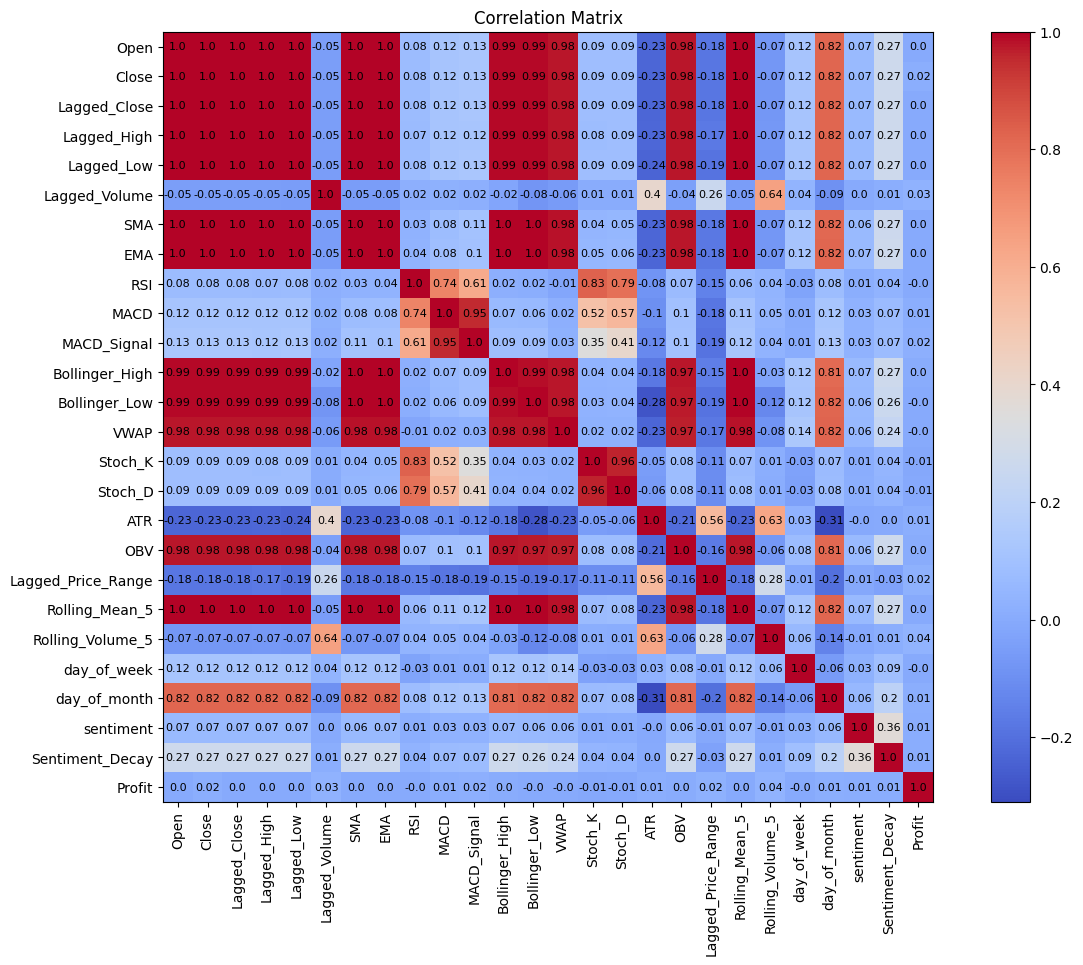

In [ ]:

corr_matrix = NV_train.corr()

plt.figure(figsize=(15, 10))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix)):
        plt.text(j, i, round(corr_matrix.iloc[i, j], 2), ha='center', va='center', color='black',fontdict={'fontsize': 8})
        #plt.scatter(j, i, s=abs(corr_matrix.iloc[i, j]) * 500, c='black', alpha=0.2)

plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

It is clearly visible that some features has very high correlation results.  So, it is required to use regularisation to reduce Multicollinearity and possible model overfitting. Also it is recomended to use models that more resistant to overfitting like Random Forest and Gradient Boosting Machines.
Lets have a look if we need to have normalisation also:

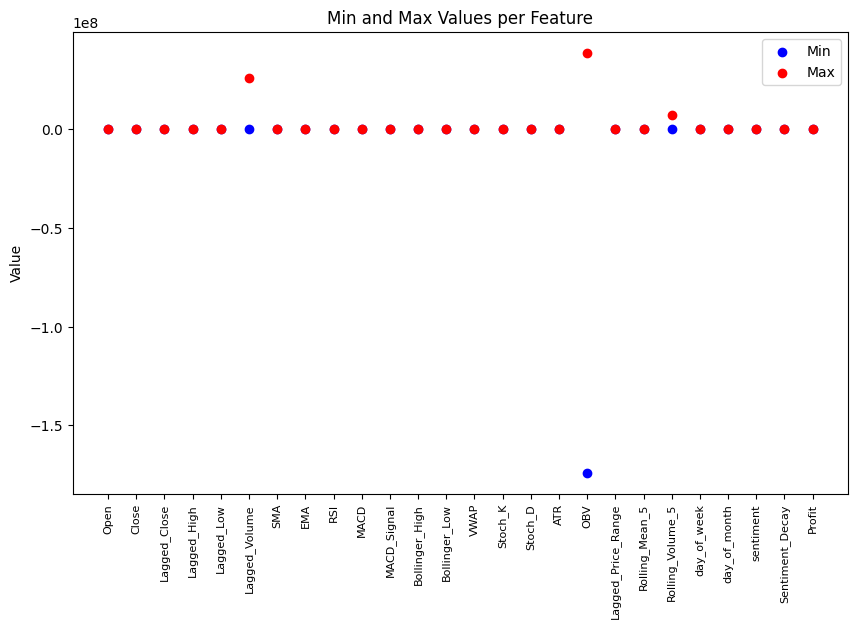

In [ ]:
# Calculate min and max values for each feature
min_values = NV_train.min()
max_values = NV_train.max()

# Create a DataFrame to store min and max values
minmax_df = pd.DataFrame({'Feature': NV_train.columns, 'Min': min_values, 'Max': max_values})

plt.figure(figsize=(10, 6))
plt.scatter(minmax_df['Feature'], minmax_df['Min'], color='blue', label='Min')
plt.scatter(minmax_df['Feature'], minmax_df['Max'], color='red', label='Max')
plt.xticks(rotation=90, fontsize=8)
plt.title('Min and Max Values per Feature')
plt.ylabel('Value')
plt.legend()
plt.show()

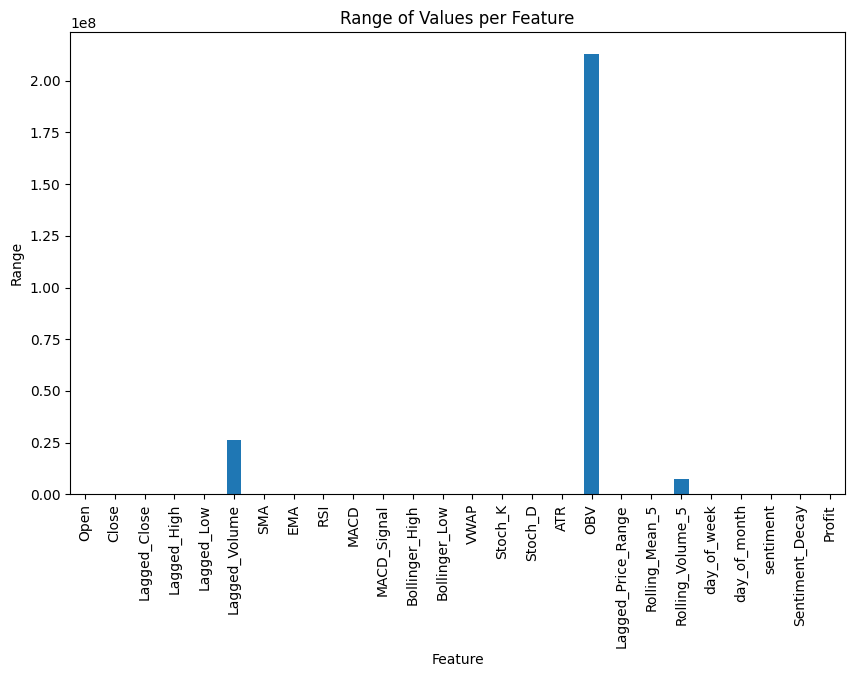

In [ ]:
# Calculate the range for each feature
ranges = NV_train.max() - NV_train.min()

# Create a bar plot
plt.figure(figsize=(10, 6))
ranges.plot(kind='bar')
plt.title('Range of Values per Feature')
plt.ylabel('Range')
plt.xlabel('Feature')
plt.show()

The variations of some features is really big and it will be impacting prediction significantly. It is required to do a normalisation of data before precessing further.

Checking missing values in the dataframe:

In [ ]:
# Check for missing values
print(NV_train.isnull().sum())

Open                  0
Close                 0
Lagged_Close          0
Lagged_High           0
Lagged_Low            0
Lagged_Volume         0
SMA                   0
EMA                   0
RSI                   0
MACD                  0
MACD_Signal           0
Bollinger_High        0
Bollinger_Low         0
VWAP                  0
Stoch_K               0
Stoch_D               0
ATR                   0
OBV                   0
Lagged_Price_Range    0
Rolling_Mean_5        0
Rolling_Volume_5      0
day_of_week           0
day_of_month          0
sentiment             0
Sentiment_Decay       0
Profit                0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

#Scale only data columns without clasification column
exclude = 'Profit'
cols_to_scale = NV_train.columns.difference([exclude])
# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler to the selected columns and transform the data
scaled_data = scaler.fit_transform(NV_train[cols_to_scale])

# Create a new DataFrame with the scaled data
scaled_NV_train = pd.DataFrame(scaled_data, columns=cols_to_scale)

# Concatenate the scaled data with the excluded column
scaled_NV_train = pd.concat([scaled_NV_train, NV_train[exclude]], axis=1)

print(scaled_NV_train)


           ATR  Bollinger_High  Bollinger_Low     Close       EMA  \
0     0.433822        0.775583       0.705016  0.156469  0.774191   
1     3.445781        0.917326       0.511808  0.108172  0.691992   
2     3.288039        0.993105       0.377287 -0.039746  0.614297   
3     3.617107        1.069124       0.228637 -0.107345  0.527189   
4     3.548706        1.127934       0.091826 -0.083220  0.442659   
...        ...             ...            ...       ...       ...   
7012 -0.589029        1.518089       1.580054  1.550038  1.545132   
7013 -0.552121        1.516736       1.580036  1.547626  1.546420   
7014 -0.597131        1.511761       1.581670  1.555539  1.547214   
7015 -0.603216        1.509284       1.582584  1.571751  1.548961   
7016 -0.604270        1.511998       1.581584  1.557275  1.552641   

      Lagged_Close  Lagged_High  Lagged_Low  Lagged_Price_Range  \
0         0.812828     0.839376    0.800085            1.755885   
1         0.156595     0.147901    0.

Lets have a look now scaled Min - Max plot:

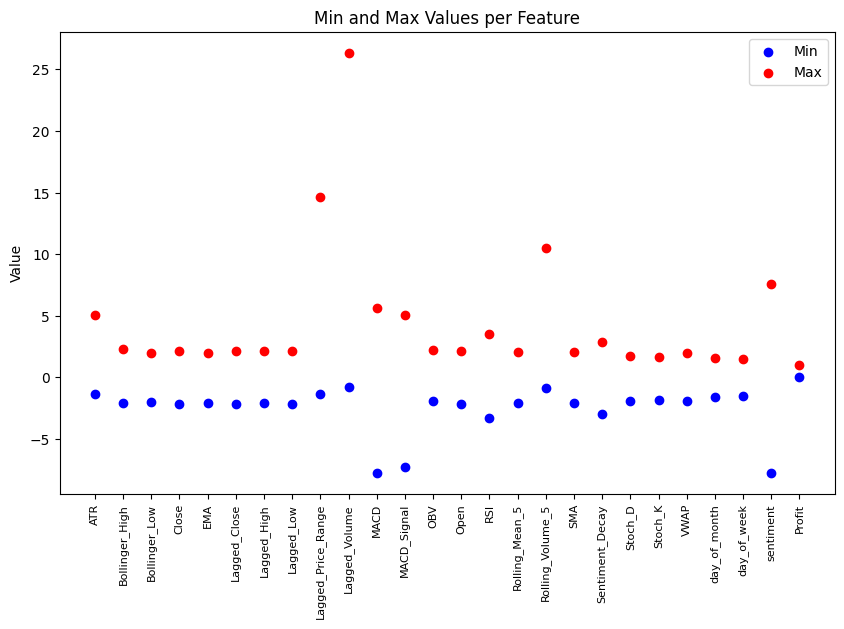

In [ ]:
# Calculate min and max values for each feature
min_values = scaled_NV_train.min()
max_values = scaled_NV_train.max()

# Create a DataFrame to store min and max values
minmax_df = pd.DataFrame({'Feature': scaled_NV_train.columns, 'Min': min_values, 'Max': max_values})

plt.figure(figsize=(10, 6))
plt.scatter(minmax_df['Feature'], minmax_df['Min'], color='blue', label='Min')
plt.scatter(minmax_df['Feature'], minmax_df['Max'], color='red', label='Max')
plt.xticks(rotation=90, fontsize=8)
plt.title('Min and Max Values per Feature')
plt.ylabel('Value')
plt.legend()
plt.show()

We need to verfy size of dataframe to decide what method can be used for dataset split.

In [ ]:
scaled_NV_train.shape

(7017, 26)

It is worth to verify distribution of prediction data from column "Profit" for the balance of data there:

In [ ]:
scaled_NV_train.Profit.value_counts()

,count
Profit,
1,3692
0,3325


Looks like data in the "Profit" column are quite balanded so, no additional balaincing action is required.

# **1. Logistic Regression**
Dataset has 7017 raws so it is relatively small dataset and for the first iteration we can use K-fold method with K=6 and Logistic Regression to see estimation for the "Profit" flag after prediction.

In [ ]:
# Select all columns except 'Profit'
X_lr = scaled_NV_train.drop('Profit', axis=1)

# Select the 'Profit' column as the target variable
Y_lr = scaled_NV_train['Profit']
#print(X_lr.head(5))
#print(Y_lr.head(5))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which 

Execution time: 525.0188014507294 seconds
Average ROC AUC: 0.938
Average Precision: 0.887
Average Recall: 0.886
Average F1-Score: 0.885


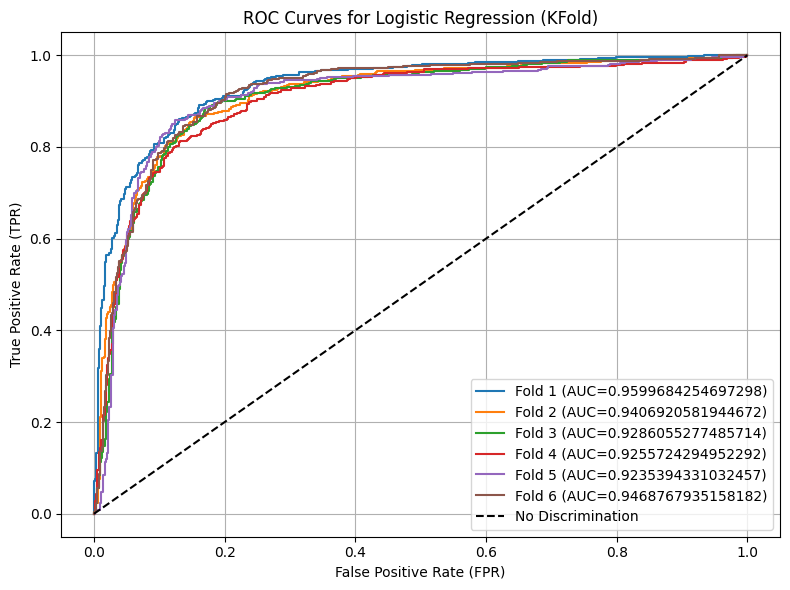

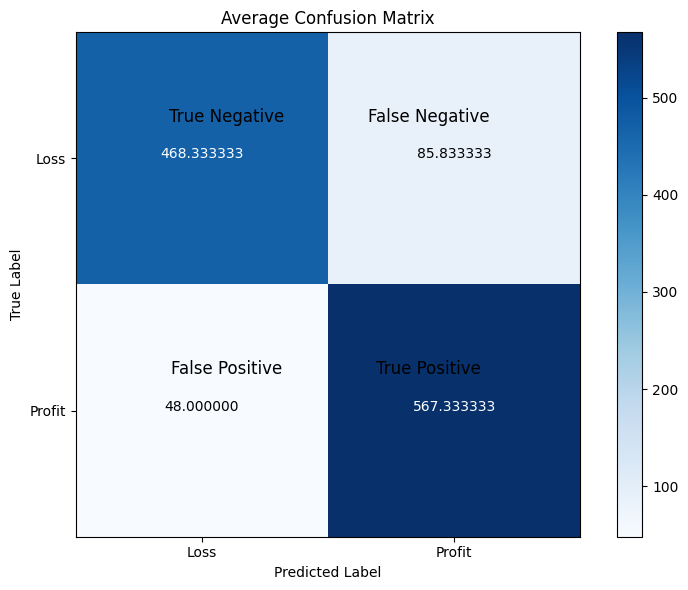

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import time

# Create a 6-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['saga']
}

# Create lists to store evaluation metrics
confusion_matrices = []
roc_aucs = []
precision_scores = []
recall_scores = []
f1_scores = []

start_time = time.time()

# Loop through each fold
for fold_no, (train_index, test_index) in enumerate(kf.split(X_lr)):
    X_train, X_test = X_lr.iloc[train_index], X_lr.iloc[test_index]
    y_train, y_test = Y_lr.iloc[train_index], Y_lr.iloc[test_index]

    # Create a GridSearchCV object for Logistic Regression
    grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')

    # Fit the GridSearchCV object to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model from GridSearchCV
    model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Calculate ROC AUC
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)

    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Print average metrics
avg_roc_auc = np.mean(roc_aucs)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1_score = np.mean(f1_scores)

print(f"Average ROC AUC: {avg_roc_auc:.3f}")
print(f"Average Precision: {avg_precision:.3f}")
print(f"Average Recall: {avg_recall:.3f}")
print(f"Average F1-Score: {avg_f1_score:.3f}")

# ROC Curve Plot for All Folds
plt.figure(figsize=(8, 6))

# Plot ROC curve for each fold with label
for i in range(len(all_fpr)):
  plt.plot(all_fpr[i], all_tpr[i], label=f'Fold {i+1} (AUC={roc_aucs[i]})')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')

# Plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Logistic Regression (KFold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix - modify for multiple folds)
class_names = ['Loss', 'Profit']
avg_cm = np.mean(confusion_matrices, axis=0)
# Define positions for quadrant labels based on number of classes (n)
#n = len(class_name)
n=1
offset = 0.2  # Adjust offset for better positioning
# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix')

# Add colorbar
plt.colorbar()

# Add x-axis and y-axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], '2f'),
             horizontalalignment="center",
             color="white" if avg_cm[i, j] > thresh else "black")

# Add quadrant labels
plt.text(n - offset+0.1, n - offset, 'True Positive', fontsize=12, ha='center', va='top')
plt.text(n - offset+0.1, -0.2, 'False Negative', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, n - offset, 'False Positive', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, -0.2, 'True Negative', fontsize=12, ha='center', va='top')

plt.tight_layout()
plt.show()

In [ ]:
best_model_LR = grid_search.best_estimator_
print("Best C:", best_model_LR.C)
print("Best Penalty:", best_model_LR.penalty)

Best C: 1
Best Penalty: l1


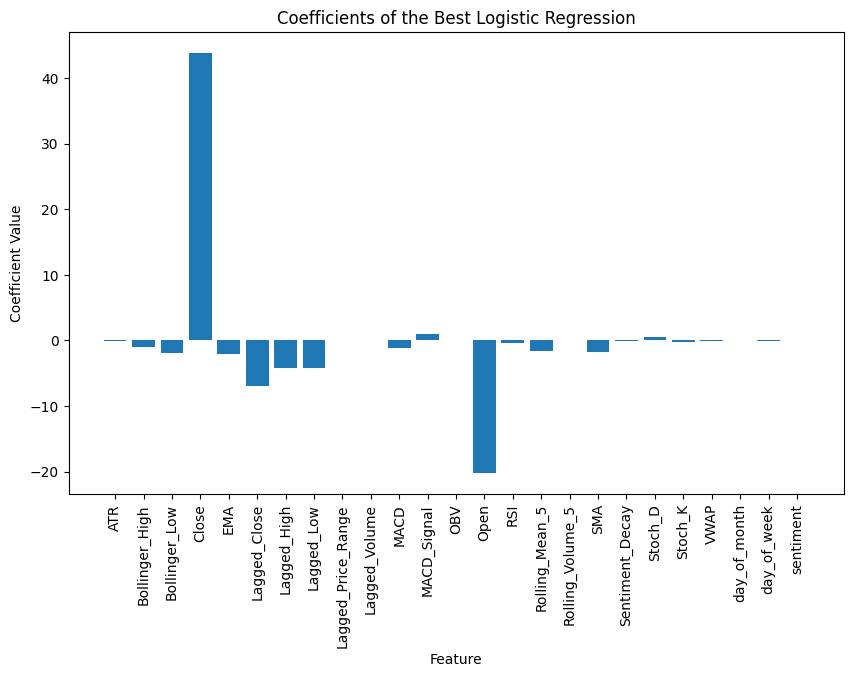

Number of zero coefficients: 0


In [ ]:
import matplotlib.pyplot as plt
coefficients = best_model_LR.coef_[0]

feature_names = X_lr.columns.tolist()
plt.figure(figsize=(10, 6))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Best Logistic Regression')
plt.show()
num_zero_coefs = np.sum(np.isclose(coefficients, 0))
print(f"Number of zero coefficients: {num_zero_coefs}")

The performance of the model looks adequate. Accuarancy and Racall at the good level as well as F1 score and ROC curves also looks not bad.
From the analysys of Average confusion matrix however, we can see that False Negative metric can be better.
The high level of False Negative data can be an indication of multiple issue as:

1.   Inappropriate mode
2.   Model complexity
3.   Data issues (insufficient data, noisey data etc.)

For the further study the aim is to verify other models performance together with parameter optimisation.
The best parameters also include L1 regularisation and it is visible that most important features for the prediction is "Open" and "Close" but, it is obvious for calculating profitability and does not provide any valuable information.




In [ ]:
import pandas as pd

# Create a DataFrame with feature names and coefficients
importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the DataFrame by the absolute value of coefficients in descending order
importance = importance.sort_values(by='Coefficient', key=abs, ascending=False)

# Print the DataFrame as a table
print(importance)

               Feature  Coefficient
3                Close    43.824178
13                Open   -20.249882
5         Lagged_Close    -6.876270
7           Lagged_Low    -4.233621
6          Lagged_High    -4.205799
4                  EMA    -2.044631
2        Bollinger_Low    -1.901764
17                 SMA    -1.758084
15      Rolling_Mean_5    -1.618141
10                MACD    -1.076484
11         MACD_Signal     0.973505
1       Bollinger_High    -0.958064
19             Stoch_D     0.470246
14                 RSI    -0.338257
20             Stoch_K    -0.296058
16    Rolling_Volume_5     0.093282
0                  ATR    -0.060199
21                VWAP    -0.052975
22        day_of_month     0.047723
8   Lagged_Price_Range     0.042587
12                 OBV     0.029833
24           sentiment     0.014983
23         day_of_week    -0.005652
18     Sentiment_Decay    -0.003009
9        Lagged_Volume     0.001548


# **2. SVM model with parameters optimisation**

As the next step we can try to evaluarte performance of SVM model together with paramers optimisation by GridSearch

Execution time: 1960.2756533622742 seconds
Average ROC AUC SVC: 0.995
Average Precision SVC: 0.964
Average Recall SVC: 0.963
Average F1-Score SVC: 0.963


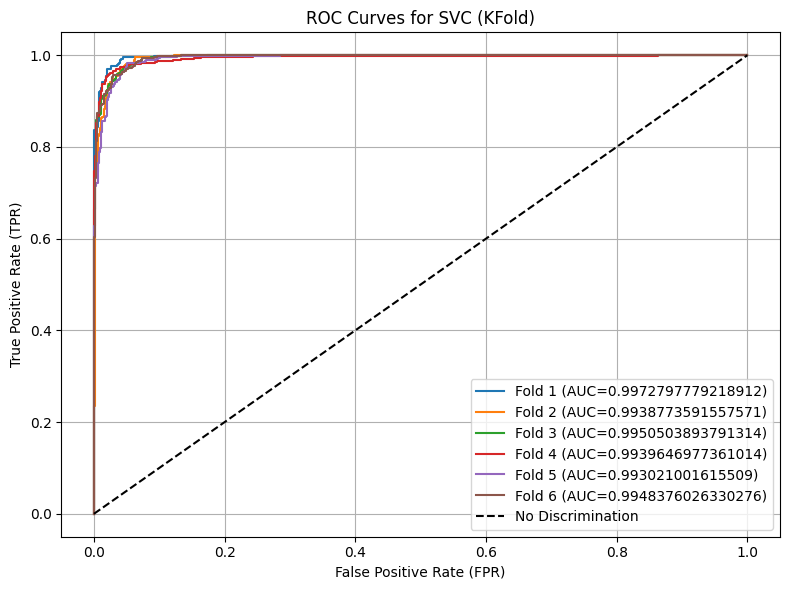

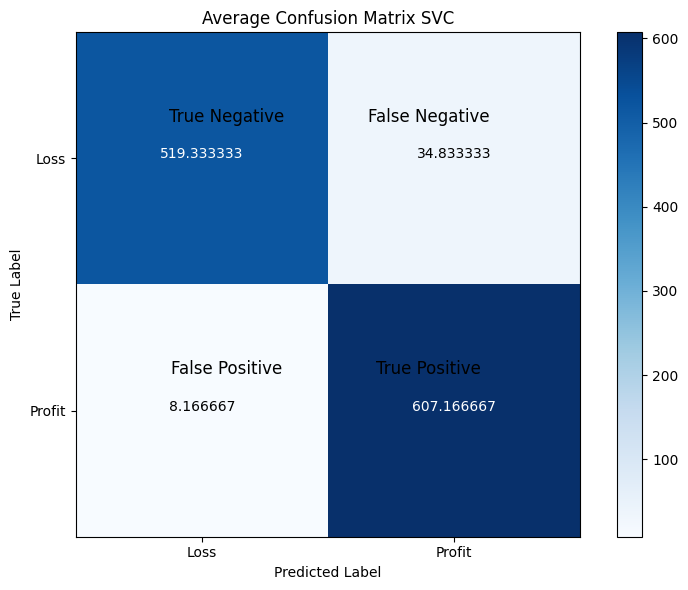

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import time

# Create a 6-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store evaluation metrics
confusion_matrices = []
roc_aucs = []
all_fpr = []  # List to store fpr values from each fold
all_tpr = []  # List to store tpr values from each fold
precision_scores = []
recall_scores = []
f1_scores = []

start_time = time.time()
# Loop through each fold
for train_index, test_index in kf.split(X_lr):
  X_train, X_test = X_lr.iloc[train_index], X_lr.iloc[test_index]
  y_train, y_test = Y_lr.iloc[train_index], Y_lr.iloc[test_index]

  # Define the parameter grid for GridSearchCV
  param_grid = {
      'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
      #'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
      'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],  # Kernel type
  }

  # Create and train the SVM model with GridSearchCV
  model = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
  model.fit(X_train, y_train)

  # Get the best model
  best_model = model.best_estimator_

  # Make predictions on the test set
  y_pred = best_model.predict(X_test)

  # Get decision function scores
  decision_scores = best_model.decision_function(X_test)

  # Estimate probabilities
  y_pred_proba = 1 / (1 + np.exp(-decision_scores))

  # Calculate Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  confusion_matrices.append(cm)

  # Calculate ROC AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  roc_aucs.append(roc_auc)
  # Store fpr and tpr for all folds
  all_fpr.append(fpr)
  all_tpr.append(tpr)

  report = classification_report(y_test, y_pred, output_dict=True)
  precision_scores.append(report['weighted avg']['precision'])
  recall_scores.append(report['weighted avg']['recall'])
  f1_scores.append(report['weighted avg']['f1-score'])

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")
# Print average metrics
avg_roc_auc_SVC = np.mean(roc_aucs)
avg_precision_SVC = np.mean(precision_scores)
avg_recall_SVC = np.mean(recall_scores)
avg_f1_score_SVC = np.mean(f1_scores)

print(f"Average ROC AUC SVC: {avg_roc_auc_SVC:.3f}")
print(f"Average Precision SVC: {avg_precision_SVC:.3f}")
print(f"Average Recall SVC: {avg_recall_SVC:.3f}")
print(f"Average F1-Score SVC: {avg_f1_score_SVC:.3f}")

# ROC Curve Plot for All Folds
plt.figure(figsize=(8, 6))

# Plot ROC curve for each fold with label
for i in range(len(all_fpr)):
  plt.plot(all_fpr[i], all_tpr[i], label=f'Fold {i+1} (AUC={roc_aucs[i]})')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')

# Plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for SVC (KFold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix - modify for multiple folds)
class_names = ['Loss', 'Profit']
avg_cm = np.mean(confusion_matrices, axis=0)
# Define positions for quadrant labels based on number of classes (n)
#n = len(class_name)
n=1
offset = 0.2  # Adjust offset for better positioning
# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix SVC')

# Add colorbar
plt.colorbar()

# Add x-axis and y-axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], '2f'),
             horizontalalignment="center",
             color="white" if avg_cm[i, j] > thresh else "black")

# Add quadrant labels
plt.text(n - offset+0.1, n - offset, 'True Positive', fontsize=12, ha='center', va='top')
plt.text(n - offset+0.1, -0.2, 'False Negative', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, n - offset, 'False Positive', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, -0.2, 'True Negative', fontsize=12, ha='center', va='top')

plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/MLProject/SVM.pkl', 'wb') as f:
    pickle.dump(model, f)

The performance of SVC model with optimised settings looks much better not only from scores but, also from average confusion matrix. However it took significant ammount of time to compute even with such relatively small dataset.
Best estimators can be found below:

In [ ]:
best_model_SVC = model.best_estimator_
print("Best C:", best_model.C)
print("Best Kernel:", best_model.kernel)

Best C: 100
Best Kernel: linear


Feature importance can be repesented as product of support vectors and dual coeficient in the next figure:

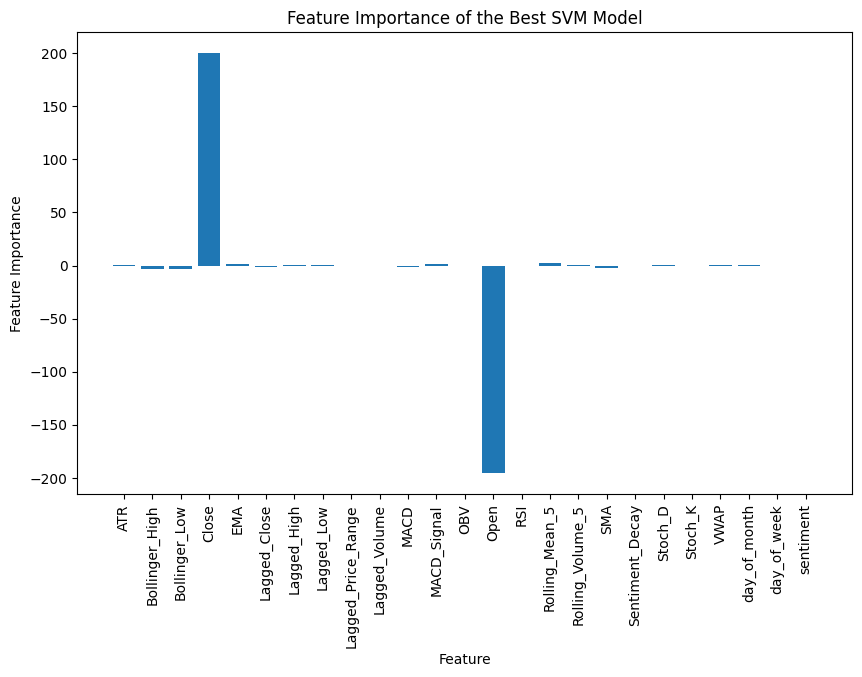

Number of features with near-zero importance: 0


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Get the support vectors and their weights
support_vectors = best_model_SVC.support_vectors_
dual_coefs = best_model_SVC.dual_coef_
# Reshape dual_coefs to (1788, 1) for broadcasting
dual_coefs = dual_coefs.reshape(-1, 1)

# Calculate feature importance as the sum of weighted support vectors
feature_importance = np.sum(dual_coefs * support_vectors, axis=0)

feature_names = X_lr.columns.tolist()
plt.figure(figsize=(10, 6))
# Plot feature importance instead of coefficients
plt.bar(range(len(feature_importance)), feature_importance)
plt.xticks(range(len(feature_importance)), feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')  # Update y-axis label
plt.title('Feature Importance of the Best SVM Model')  # Update title
plt.show()

# Calculate number of features with near-zero importance
num_zero_importance = np.sum(np.isclose(feature_importance, 0))
print(f"Number of features with near-zero importance: {num_zero_importance}")

# **2.1 SVM with Nystroem optimisation**
Even through observed SVM performing really good there is a significant issue with computation time that can be critical. To improve this issue it is possible to use Nystroem aproximation method and compare performance of the model and excution time

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Execution time: 8571.118863582611 seconds
Average ROC AUC SVC_Ny: 0.512
Average Precision SVC_Ny: 0.277
Average Recall SVC_Ny: 0.526
Average F1-Score SVC_Ny: 0.363


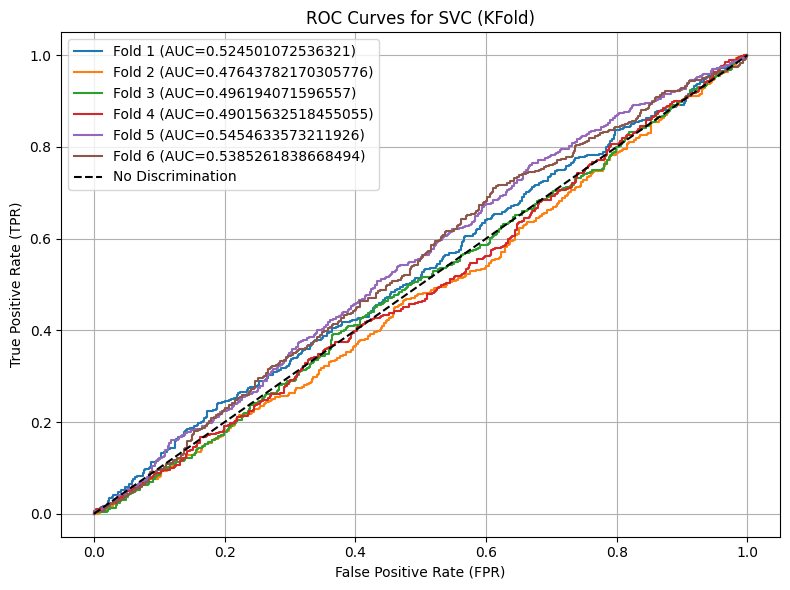

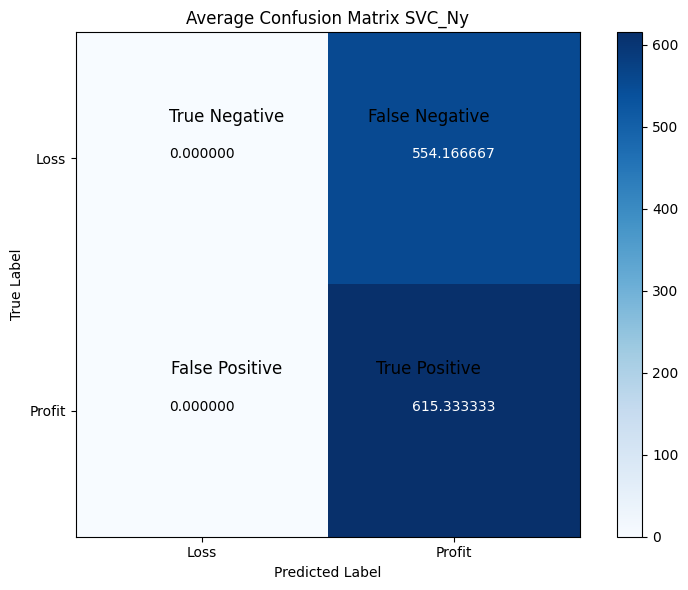

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import Nystroem
from joblib import Parallel, delayed
import time
import numpy as np

# Create a 6-fold cross-validation object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Lists to store evaluation metrics
confusion_matrices = []
roc_aucs = []
all_fpr = []  # List to store fpr values from each fold
all_tpr = []  # List to store tpr values from each fold
precision_scores = []
recall_scores = []
f1_scores = []

start_time = time.time()
# Loop through each fold
for train_index, test_index in kf.split(X_lr):
  X_train, X_test = X_lr.iloc[train_index], X_lr.iloc[test_index]
  y_train, y_test = Y_lr.iloc[train_index], Y_lr.iloc[test_index]

  # Remove feature names (if not required)
  #X_train = X_train.values  # Convert to numpy array
  #X_test = X_test.values

  # Define the parameter grid for GridSearchCV
  param_grid = {
      'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
      #'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
      'kernel': ['rbf', 'poly', 'linear', 'sigmoid'],  # Kernel type
  }

  # Create Nystroem transformer with a smaller subsample size (adjust as needed)
  transformer = Nystroem(random_state=42, n_components=800)
  X_train_transformed = transformer.fit_transform(X_train)

  # Create and train the SVM model with GridSearchCV
  model = GridSearchCV(SVC(), param_grid, cv=5, scoring='f1', n_jobs=-1)
  model.fit(X_train_transformed, y_train)

  # Get the best model
  best_model = model.best_estimator_

  # Make predictions on the test set (transform test data first)
  X_test_transformed = transformer.transform(X_test)
  y_pred = best_model.predict(X_test_transformed)

  # Get decision function scores
  decision_scores = best_model.decision_function(X_test_transformed)

  # Estimate probabilities
  y_pred_proba = 1 / (1 + np.exp(-decision_scores))

  # Calculate Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  confusion_matrices.append(cm)

  # Calculate ROC AUC
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  roc_aucs.append(roc_auc)
  # Store fpr and tpr for all folds
  all_fpr.append(fpr)
  all_tpr.append(tpr)

  report = classification_report(y_test, y_pred, output_dict=True)
  precision_scores.append(report['weighted avg']['precision'])
  recall_scores.append(report['weighted avg']['recall'])
  f1_scores.append(report['weighted avg']['f1-score'])

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")
# Print average metrics
avg_roc_auc_SVC_Ny = np.mean(roc_aucs)
avg_precision_SVC_Ny = np.mean(precision_scores)
avg_recall_SVC_Ny = np.mean(recall_scores)
avg_f1_score_SVC_Ny = np.mean(f1_scores)

print(f"Average ROC AUC SVC_Ny: {avg_roc_auc_SVC_Ny:.3f}")
print(f"Average Precision SVC_Ny: {avg_precision_SVC_Ny:.3f}")
print(f"Average Recall SVC_Ny: {avg_recall_SVC_Ny:.3f}")
print(f"Average F1-Score SVC_Ny: {avg_f1_score_SVC_Ny:.3f}")

# ROC Curve Plot for All Folds
plt.figure(figsize=(8, 6))

# Plot ROC curve for each fold with label
for i in range(len(all_fpr)):
  plt.plot(all_fpr[i], all_tpr[i], label=f'Fold {i+1} (AUC={roc_aucs[i]})')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')

# Plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for SVC (KFold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix - modify for multiple folds)
class_names = ['Loss', 'Profit']
avg_cm = np.mean(confusion_matrices, axis=0)
# Define positions for quadrant labels based on number of classes (n)
#n = len(class_name)
n=1
offset = 0.2  # Adjust offset for better positioning
# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix SVC_Ny')

# Add colorbar
plt.colorbar()

# Add x-axis and y-axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], '2f'),
             horizontalalignment="center",
             color="white" if avg_cm[i, j] > thresh else "black")

# Add quadrant labels
plt.text(n - offset+0.1, n - offset, 'True Positive', fontsize=12, ha='center', va='top')
plt.text(n - offset+0.1, -0.2, 'False Negative', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, n - offset, 'False Positive', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, -0.2, 'True Negative', fontsize=12, ha='center', va='top')

plt.tight_layout()
plt.show()

In [ ]:
with open('/content/drive/MyDrive/MLProject/SVM_with_Nystroem_800.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
best_model_SVC_Ny = model.best_estimator_
#print(best_model_SVC.get_params())
print("Best C:", best_model.C)
print("Best Kernel:", best_model.kernel)
#print("Best Gamma:", best_model.gamma)

Best C: 0.01
Best Kernel: rbf


With low number of components (transformer = Nystroem(random_state=42, n_components=100)) for Nystrom model saving of computation time ~30% but, as it is visible above accuracy and quality of the model dropped significnatly. It is not worth to use Nystroem transformation for this dataset with SVM.

# **3. Random Forrest with optimised parameters**
As the last method we can try to use Random Forest model to compare performance with SVM and evaluate processing time required for model tunning and prediction.

Execution time: 1112.4569804668427 seconds
Average ROC AUC RF: 0.624
Average Precision RF: 0.596
Average Recall RF: 0.596
Average F1-Score RF: 0.591


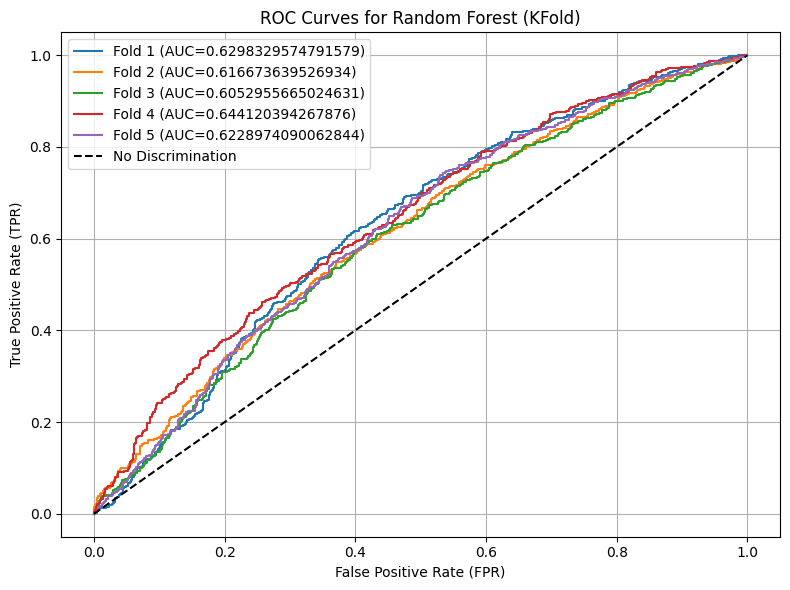

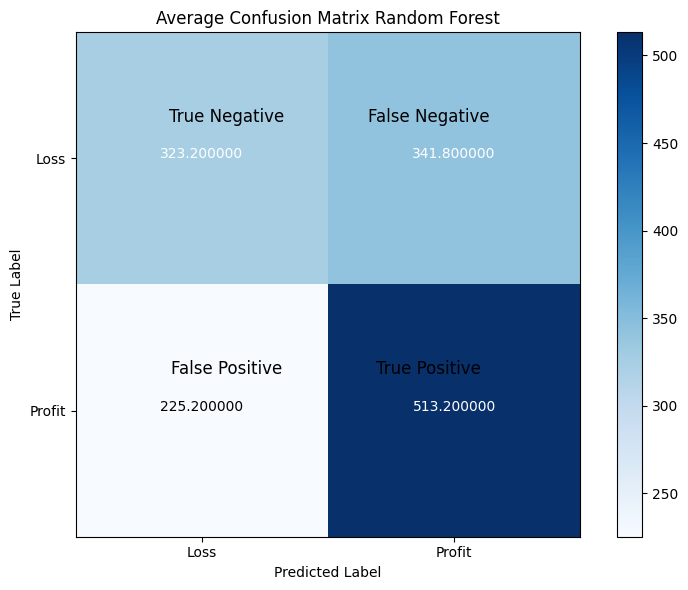

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import time

# Create a 5-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store evaluation metrics
confusion_matrices = []
roc_aucs = []
all_fpr = []  # List to store fpr values from each fold
all_tpr = []  # List to store tpr values from each fold
precision_scores = []
recall_scores = []
f1_scores = []

start_time = time.time()
# Loop through each fold
for train_index, test_index in kf.split(X_lr):
  X_train, X_test = X_lr.iloc[train_index], X_lr.iloc[test_index]
  y_train, y_test = Y_lr.iloc[train_index], Y_lr.iloc[test_index]

  # Define the parameter grid for GridSearchCV
  param_grid = {
      'n_estimators': [400, 500, 600],  # Number of trees in the forest
      'min_samples_split': [6],  # Minimum samples required to split a node
      'min_samples_leaf': [6],  # Minimum samples required at each leaf node
  }

  # Create and train the Random Forest model with GridSearchCV
  model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='f1', n_jobs=-1)
  model.fit(X_train, y_train)

  # Get the best model
  best_model = model.best_estimator_

  # Make predictions on the test set
  y_pred = best_model.predict(X_test)

  # Calculate Confusion Matrix
  cm = confusion_matrix(y_test, y_pred)
  confusion_matrices.append(cm)

  # Calculate ROC AUC
  fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
  roc_auc = auc(fpr, tpr)
  roc_aucs.append(roc_auc)
  # Store fpr and tpr for all folds
  all_fpr.append(fpr)
  all_tpr.append(tpr)

  report = classification_report(y_test, y_pred, output_dict=True)
  precision_scores.append(report['weighted avg']['precision'])
  recall_scores.append(report['weighted avg']['recall'])
  f1_scores.append(report['weighted avg']['f1-score'])

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Print average metrics
avg_roc_auc_RF = np.mean(roc_aucs)
avg_precision_RF = np.mean(precision_scores)
avg_recall_RF = np.mean(recall_scores)
avg_f1_score_RF = np.mean(f1_scores)

print(f"Average ROC AUC RF: {avg_roc_auc_RF:.3f}")
print(f"Average Precision RF: {avg_precision_RF:.3f}")
print(f"Average Recall RF: {avg_recall_RF:.3f}")
print(f"Average F1-Score RF: {avg_f1_score_RF:.3f}")

# ROC Curve Plot for All Folds
plt.figure(figsize=(8, 6))

# Plot ROC curve for each fold with label
for i in range(len(all_fpr)):
  plt.plot(all_fpr[i], all_tpr[i], label=f'Fold {i+1} (AUC={roc_aucs[i]})')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')

# Plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Random Forest (KFold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix - modify for multiple folds)
class_names = ['Loss', 'Profit']
avg_cm = np.mean(confusion_matrices, axis=0)
# Define positions for quadrant labels based on number of classes (n)
#n = len(class_name)
n=1
offset = 0.2  # Adjust offset for better positioning
# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix Random Forest')

# Add colorbar
plt.colorbar()

# Add x-axis and y-axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], '2f'),
             horizontalalignment="center",
             color="white" if avg_cm[i, j] > thresh else "black")

# Add quadrant labels
plt.text(n - offset+0.1, n - offset, 'True Positive', fontsize=12, ha='center', va='top')
plt.text(n - offset+0.1, -0.2, 'False Negative', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, n - offset, 'False Positive', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, -0.2, 'True Negative', fontsize=12, ha='center', va='top')

plt.tight_layout()
plt.show()

In [ ]:
best_model_SVC_RF = model.best_estimator_
best_model_SVC_RF

RandomForestClassifier(min_samples_leaf=6, min_samples_split=6,
                       n_estimators=400)

In [ ]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"trian Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

In [ ]:
print(get_accuracy(X_train, X_test, y_train, y_test, model))

{'test Accuracy': 0.5972915181753385, 'trian Accuracy': 0.9757748485928037}


In [ ]:
import pickle
with open('/content/drive/MyDrive/MLProject/RandomForest_1.pkl', 'wb') as f:
    pickle.dump(model, f)

Despite extensive optimization and tuning of hyperparameters, the Random Forest model's performance remains unsatisfactory. A comparison of training and testing accuracy indicates that the model is overfitting, and additional pruning does not yield significant improvements.

As the last model we can try asses performance of Gradient Boosting model particularly XGBoost cause it can potentially perform better with some datasets.

# **3. Gradient Boosting with XGBoost model**
Gradient Boosting is an additive model where we add weak learners to minimize the loss function.
 The XGBoost, an open-source software library that provides a regularizing gradient boosting framework. XGBoost can use different types of weak learners called boosters for classification and regression.

In [ ]:
from xgboost import XGBClassifier

Execution time: 1822.8732645511627 seconds
Average ROC AUC XGB: 0.808
Average Precision XGB: 0.733
Average Recall XGB: 0.733
Average F1-Score XGB: 0.732


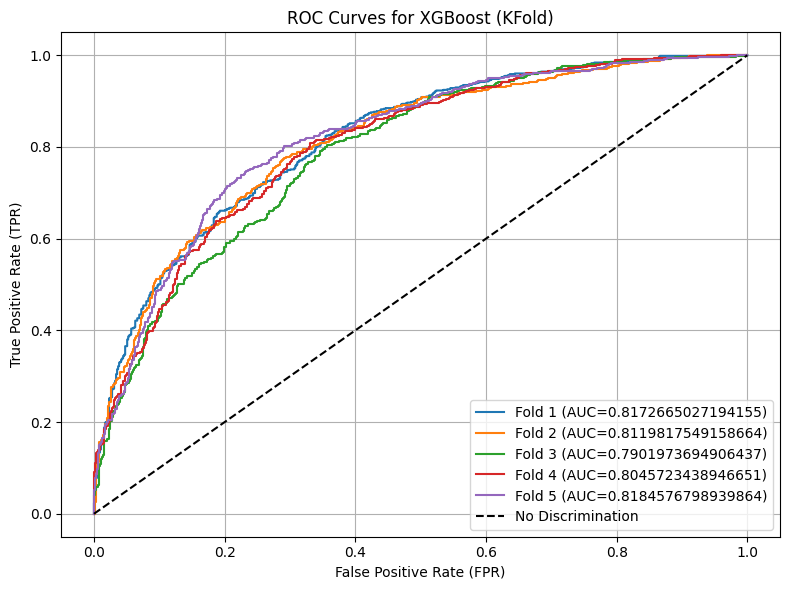

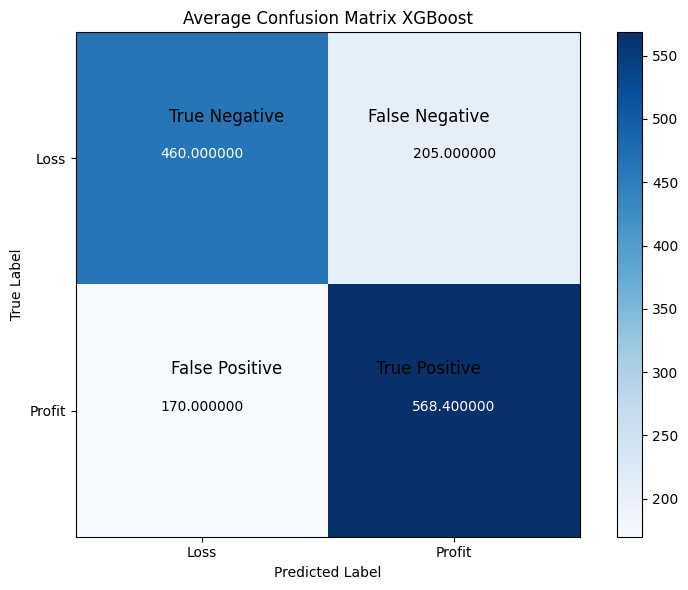

In [ ]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import time
import numpy as np

# Create a 5-fold cross-validation object
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the XGBoost model
model = XGBClassifier()

# Lists to store evaluation metrics
confusion_matrices = []
roc_aucs = []
all_fpr = []  # List to store fpr values from each fold
all_tpr = []  # List to store tpr values from each fold
precision_scores = []
recall_scores = []
f1_scores = []

start_time = time.time()
# Loop through each fold
for train_index, test_index in kf.split(X_lr):
    X_train, X_test = X_lr.iloc[train_index], X_lr.iloc[test_index]
    y_train, y_test = Y_lr.iloc[train_index], Y_lr.iloc[test_index]

    # Define the parameter grid for GridSearchCV (adjust parameters for XGBoost)
    param_grid = {
        'n_estimators': [300, 400, 500],  # Number of trees in the forest (common range)
        'max_depth': [4, 6, 8],  # Maximum depth of trees (common range)
        'learning_rate': [0.4, 0.5, 0.6, 0.7, 1],  # Minimum sum of weights required for a child node
    }

    # Create and train the XGBoost model with GridSearchCV
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train,
                eval_set=[(X_test, y_test)],
                verbose=False
                )

    # Get the best model
    best_model = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_model.predict(X_test)

    # Calculate Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices.append(cm)

    # Calculate ROC AUC
    fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])
    roc_auc = auc(fpr, tpr)
    roc_aucs.append(roc_auc)
    # Store fpr and tpr for all folds
    all_fpr.append(fpr)
    all_tpr.append(tpr)

    report = classification_report(y_test, y_pred, output_dict=True)
    precision_scores.append(report['weighted avg']['precision'])
    recall_scores.append(report['weighted avg']['recall'])
    f1_scores.append(report['weighted avg']['f1-score'])

end_time = time.time()
execution_time = end_time - start_time
print("Execution time:", execution_time, "seconds")

# Print average metrics
avg_roc_auc_XGB = np.mean(roc_aucs)
avg_precision_XGB = np.mean(precision_scores)
avg_recall_XGB = np.mean(recall_scores)
avg_f1_score_XGB = np.mean(f1_scores)

print(f"Average ROC AUC XGB: {avg_roc_auc_XGB:.3f}")
print(f"Average Precision XGB: {avg_precision_XGB:.3f}")
print(f"Average Recall XGB: {avg_recall_XGB:.3f}")
print(f"Average F1-Score XGB: {avg_f1_score_XGB:.3f}")

# ROC Curve Plot for All Folds
plt.figure(figsize=(8, 6))

# Plot ROC curve for each fold with label
for i in range(len(all_fpr)):
  plt.plot(all_fpr[i], all_tpr[i], label=f'Fold {i+1} (AUC={roc_aucs[i]})')

# Plot diagonal for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='black', label='No Discrimination')

# Plot labels and title
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for XGBoost (KFold)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualize Confusion Matrix - modify for multiple folds)
class_names = ['Loss', 'Profit']
avg_cm = np.mean(confusion_matrices, axis=0)
# Define positions for quadrant labels based on number of classes (n)
#n = len(class_name)
n=1
offset = 0.2  # Adjust offset for better positioning
# Plot the average confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(avg_cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Average Confusion Matrix XGBoost')

# Add colorbar
plt.colorbar()

# Add x-axis and y-axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add tick marks and labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Add text annotations to each cell
thresh = avg_cm.max() / 2.
for i, j in np.ndindex(avg_cm.shape):
    plt.text(j, i, format(avg_cm[i, j], '2f'),
             horizontalalignment="center",
             color="white" if avg_cm[i, j] > thresh else "black")

# Add quadrant labels
plt.text(n - offset+0.1, n - offset, 'True Positive', fontsize=12, ha='center', va='top')
plt.text(n - offset+0.1, -0.2, 'False Negative', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, n - offset, 'False Positive', fontsize=12, ha='center', va='top')
plt.text(0 + offset-0.1, -0.2, 'True Negative', fontsize=12, ha='center', va='top')

plt.tight_layout()
plt.show()

In [ ]:
best_model_XGBoost = grid_search.best_estimator_
best_model_XGBoost

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
print(get_accuracy(X_train, X_test, y_train, y_test, grid_search))

{'test Accuracy': 0.751960085531005, 'trian Accuracy': 1.0}


In [ ]:
results = best_model_XGBoost.evals_result()
print(results)

{'validation_0': OrderedDict([('logloss', [0.6944858905509464, 0.6916882932313578, 0.6896707438097116, 0.6919122163899354, 0.6939563791792646, 0.6930658195754587, 0.6942889008535629, 0.6940337747484127, 0.6818157115623259, 0.6807901222665057, 0.6774864586990218, 0.6773813927250085, 0.6786558711350347, 0.6778204576381173, 0.6781115400434305, 0.678159670581668, 0.6738986457490276, 0.6732780851811404, 0.6667242245277335, 0.6637712647701618, 0.6604221045057517, 0.6545241115374474, 0.6556986496755249, 0.6561334921433428, 0.656372962130535, 0.6564082818441703, 0.6549017116353075, 0.6547608287608038, 0.6544368574747594, 0.647487191609502, 0.6476380063309809, 0.6478577397726556, 0.6475978445843212, 0.6429288970759233, 0.6441060670691988, 0.6436610530772467, 0.6445001410433249, 0.643336303101976, 0.6384294077817746, 0.6365346418572848, 0.6371623475054121, 0.6317688264563436, 0.6330857093015145, 0.6335204432765587, 0.6332647867569818, 0.6334075963208272, 0.6309428852919757, 0.630283639838631, 0.

100%|██████████| 10/10 [1:00:35<00:00, 363.53s/it]


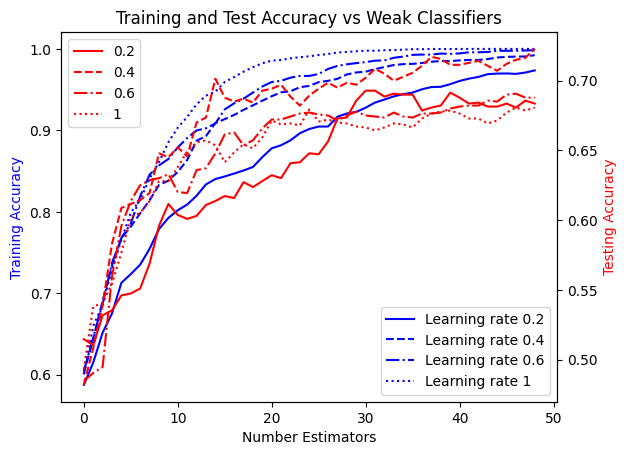

In [ ]:
from tqdm import tqdm
get_accuracy_boost_cv(X_lr,Y_lr,title="Training and Test Accuracy vs Weak Classifiers",times=10,xlabel='Number Estimators', n_est = 50)

The summary of all calculated metrics can be found in the table bellow:


In [ ]:
avg_roc_auc = 0.938
avg_precision = 0.887
avg_recall = 0.886
avg_f1_score = 0.885

avg_roc_auc_SVC = 0.995
avg_precision_SVC = 0.964
avg_recall_SVC = 0.963
avg_f1_score_SVC = 0.963

avg_roc_auc_SVC_Ny = 0.512
avg_precision_SVC_Ny = 0.277
avg_recall_SVC_Ny = 0.526
avg_f1_score_SVC_Ny = 0.363

avg_roc_auc_RF = 0.624
avg_precision_RF = 0.596
avg_recall_RF = 0.596
avg_f1_score_RF = 0.591

avg_roc_auc_XGB = 0.808
avg_precision_XGB = 0.733
avg_recall_XGB = 0.733
avg_f1_score_XGB = 0.732

In [ ]:
# Create a list of model names and their corresponding MSE and standard deviation values
data = [
    ['Logistic Regression', avg_roc_auc, avg_precision, avg_recall, avg_f1_score],
    ['SVC', avg_roc_auc_SVC, avg_precision_SVC, avg_recall_SVC, avg_f1_score_SVC],
    ['SVC Nyostrom ', avg_roc_auc_SVC_Ny, avg_precision_SVC_Ny, avg_recall_SVC_Ny, avg_f1_score_SVC_Ny],
    ['Random Forest', avg_roc_auc_RF, avg_precision_RF, avg_recall_RF, avg_f1_score_RF],
    ['XGBoost', avg_roc_auc_XGB, avg_precision_XGB, avg_recall_XGB, avg_f1_score_XGB]
]

# Create a DataFrame from the data
summary = pd.DataFrame(data, columns=['Model Type', 'Average ROC AUC', 'Average Precision', 'Average Recall', 'Average F1-Score'])

# Style the DataFrame
styled_summary = summary.style.set_properties(**{'text-align': 'center'}) \
              .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}]) \
              .set_caption('Model Performance Summary') \
              .format({'Average ROC AUC': '{:.2f}', 'Average Precision': '{:.2f}', 'Average Recall': '{:.2f}','Average F1-Score': '{:.2f}'})

# Display the styled DataFrame
styled_summary

,Model Type,Average ROC AUC,Average Precision,Average Recall,Average F1-Score
0,Logistic Regression,0.94,0.89,0.89,0.89
1,SVC,0.99,0.96,0.96,0.96
2,SVC Nyostrom,0.51,0.28,0.53,0.36
3,Random Forest,0.62,0.60,0.60,0.59
4,XGBoost,0.81,0.73,0.73,0.73


# **The Conclusion**
The study indicates that, for this dataset, the Support Vector Machine (SVM) model provides very good results and can be used for predicting profit/loss indicators. However, due to its potentially significant computation time, using SVM can be problematic. Basic Logistic Regression with L1 regularization can also yield acceptable results while offering much faster execution times.

XGBoost, while providing a third-best accuracy, still requires more computational resources compared to Logistic Regression.